In [42]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

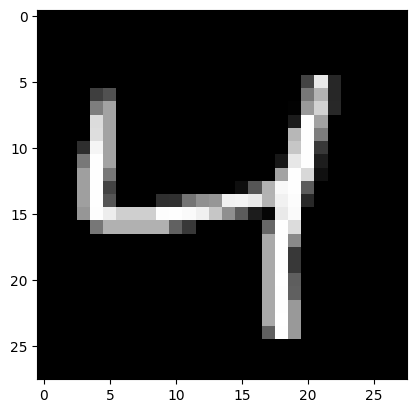

In [44]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2], cmap="gray")

In [45]:
print(x_train[2])
x_train_normal = x_train/255.0
x_test_normal = x_test/255.0

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [46]:
y_train_ctgr=to_categorical(y_train, 10)
y_test_ctgr=to_categorical(y_test, 10)

In [47]:
model = Sequential ([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train_normal, y_train_ctgr, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8856 - loss: 0.3979
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9705 - loss: 0.0971
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0608
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0481
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0349


In [53]:
import tkinter as tk
import numpy as np
from PIL import Image, ImageDraw
screen = tk.Tk()
screen.title("HandWritten")
screen.geometry("300x300")

drawn = False

img = Image.new(mode="L", size=(100, 100), color="black")
img_draw = ImageDraw.Draw(im=img)

def predicting():
    img_resized=img.resize((28, 28))
    img_resized=np.array(img_resized)
    img_normal=img_resized/255.0
    img_expanded=np.expand_dims(img_normal, axis=0)
    img_predict = model.predict(img_expanded)
    img_img=np.argmax(img_predict)
    img_label = tk.Label(screen, text=str(img_img))
    img_label.place(x=200, y=20)

predict = tk.Button(screen, text="Draw something", command=predicting, state=tk.DISABLED)
predict.place(x=20, y=230)

def draw(event):
    global drawn
    x, y = event.x, event.y
    widget.create_oval(x, y, x+10, y+10, fill="black", width=5)
    img_draw.ellipse((x, y, x+10, y+10), fill="orange")
    if drawn == False:
        drawn = True
        print(drawn)
        predict.config(text="Predict", state=tk.NORMAL)
        clear.config(state=tk.NORMAL)

print(drawn)

def clearing():
    global img, drawn, img_draw
    drawn = False
    print(drawn)
    widget.delete("all")
    predict.config(text="Draw something", state=tk.DISABLED)
    clear.config(state=tk.DISABLED)
    img = Image.new(mode="L", size=(100, 100), color="black")
    img_draw = ImageDraw.Draw(im=img)


widget=tk.Canvas(screen, width=100, height=100, background="orange")
widget.place(x=50, y=50)
widget.bind("<B1-Motion>", draw)

label = tk.Label(screen, text="Draw a number")
label.place(x=20, y=20)

clear= tk.Button(screen, text="Clear", command=clearing, state=tk.DISABLED)
clear.place(x=170, y=230)

screen.mainloop()

False
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
False
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
